In [1]:
import numpy as np
from matplotlib import pyplot as plt 
plt.rcParams.update({'font.size': 20})

In [3]:
# problem setting
b_init = 0
c_init = 0
e_init= 1
v_init = 1

# optimization params
T=100000
step_size=1e-3

# kernelgan hyperparams
lam = 0.01
delta = 0
sigma = 1
ptil = 0.1


alpha = lam
kappa = delta/sigma**2
beta = 1.5/sigma**4
mu = ptil

In [4]:
# zero mean case scenario
c,v = c_init,v_init
c_hist,v_hist = [],[]
for t in range(T):
    c_new=c + step_size*(-alpha*c + kappa + beta*v)
    v_new=v + step_size*(-mu*c*v)
    c,v = c_new,v_new
    c_hist.append(c)
    v_hist.append(v)

In [5]:
# full dynamics
c,v = c_init,v_init
b,e = b_init, e_init
c_full_hist,v_full_hist = [],[]
e_full_hist = []
for t in range(T):
    b_new= b + step_size*(-alpha*b- 0.667*beta*e)
    c_new=c + step_size*(-alpha*c + kappa + beta*v+ beta*e**2)
    e_new=e + step_size*(-mu*c*e+mu*b)
    v_new=v + step_size*(-mu*c*v)
    c,v = c_new,v_new
    b,e = b_new, e_new
    c_full_hist.append(c)
    e_full_hist.append(e)
    v_full_hist.append(v)

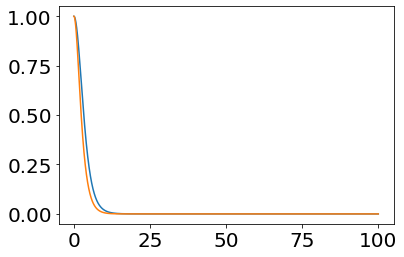

In [6]:
time = np.arange(T)*step_size
plt.plot(time, v_hist)
plt.plot(time, v_full_hist)
# plt.plot(c_hist)
# plt.plot(c_full_hist)
# plt.plot(e_full_hist)
# plt.plot(L1)
plt.show()

### Can zero mean dynamics upper bound SMM?

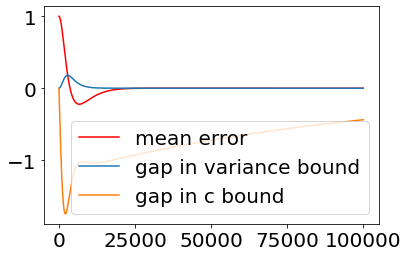

In [7]:
v_gap = np.array(v_hist)-np.array(v_full_hist)
c_gap = np.array(c_hist)-np.array(c_full_hist)


plt.plot(e_full_hist, label='mean error', c='r')
plt.plot(v_gap, label='gap in variance bound')
plt.plot(c_gap, label='gap in c bound')
plt.legend()

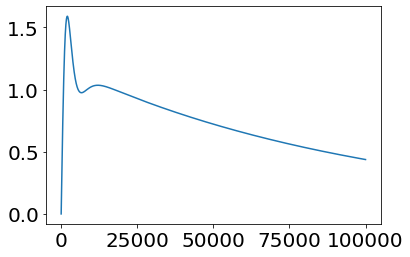

In [8]:
plt.plot(np.abs(c_gap)-np.abs(v_gap))

## Proposition 1 Plot of Bound

In [9]:
# exponent function (looks like t or t^2)
g = lambda x,lam: (x**2)/4 if x<=2/lam else (x/lam)-(1/lam**2)
g(5,0.5)

6.0

In [19]:
eps_list=[0.5, 0.1, 0.05, 0.01]
v_bound=np.zeros((len(eps_list),T))
for i, eps in enumerate(eps_list):
    C_eps = 2*ptil*(delta+1.5*eps)
    v_exp = v_init*np.exp([-C_eps*g(t,lam)/sigma**2 for t in time])
    v_bound[i,:] = np.maximum(v_exp, eps*sigma**2)

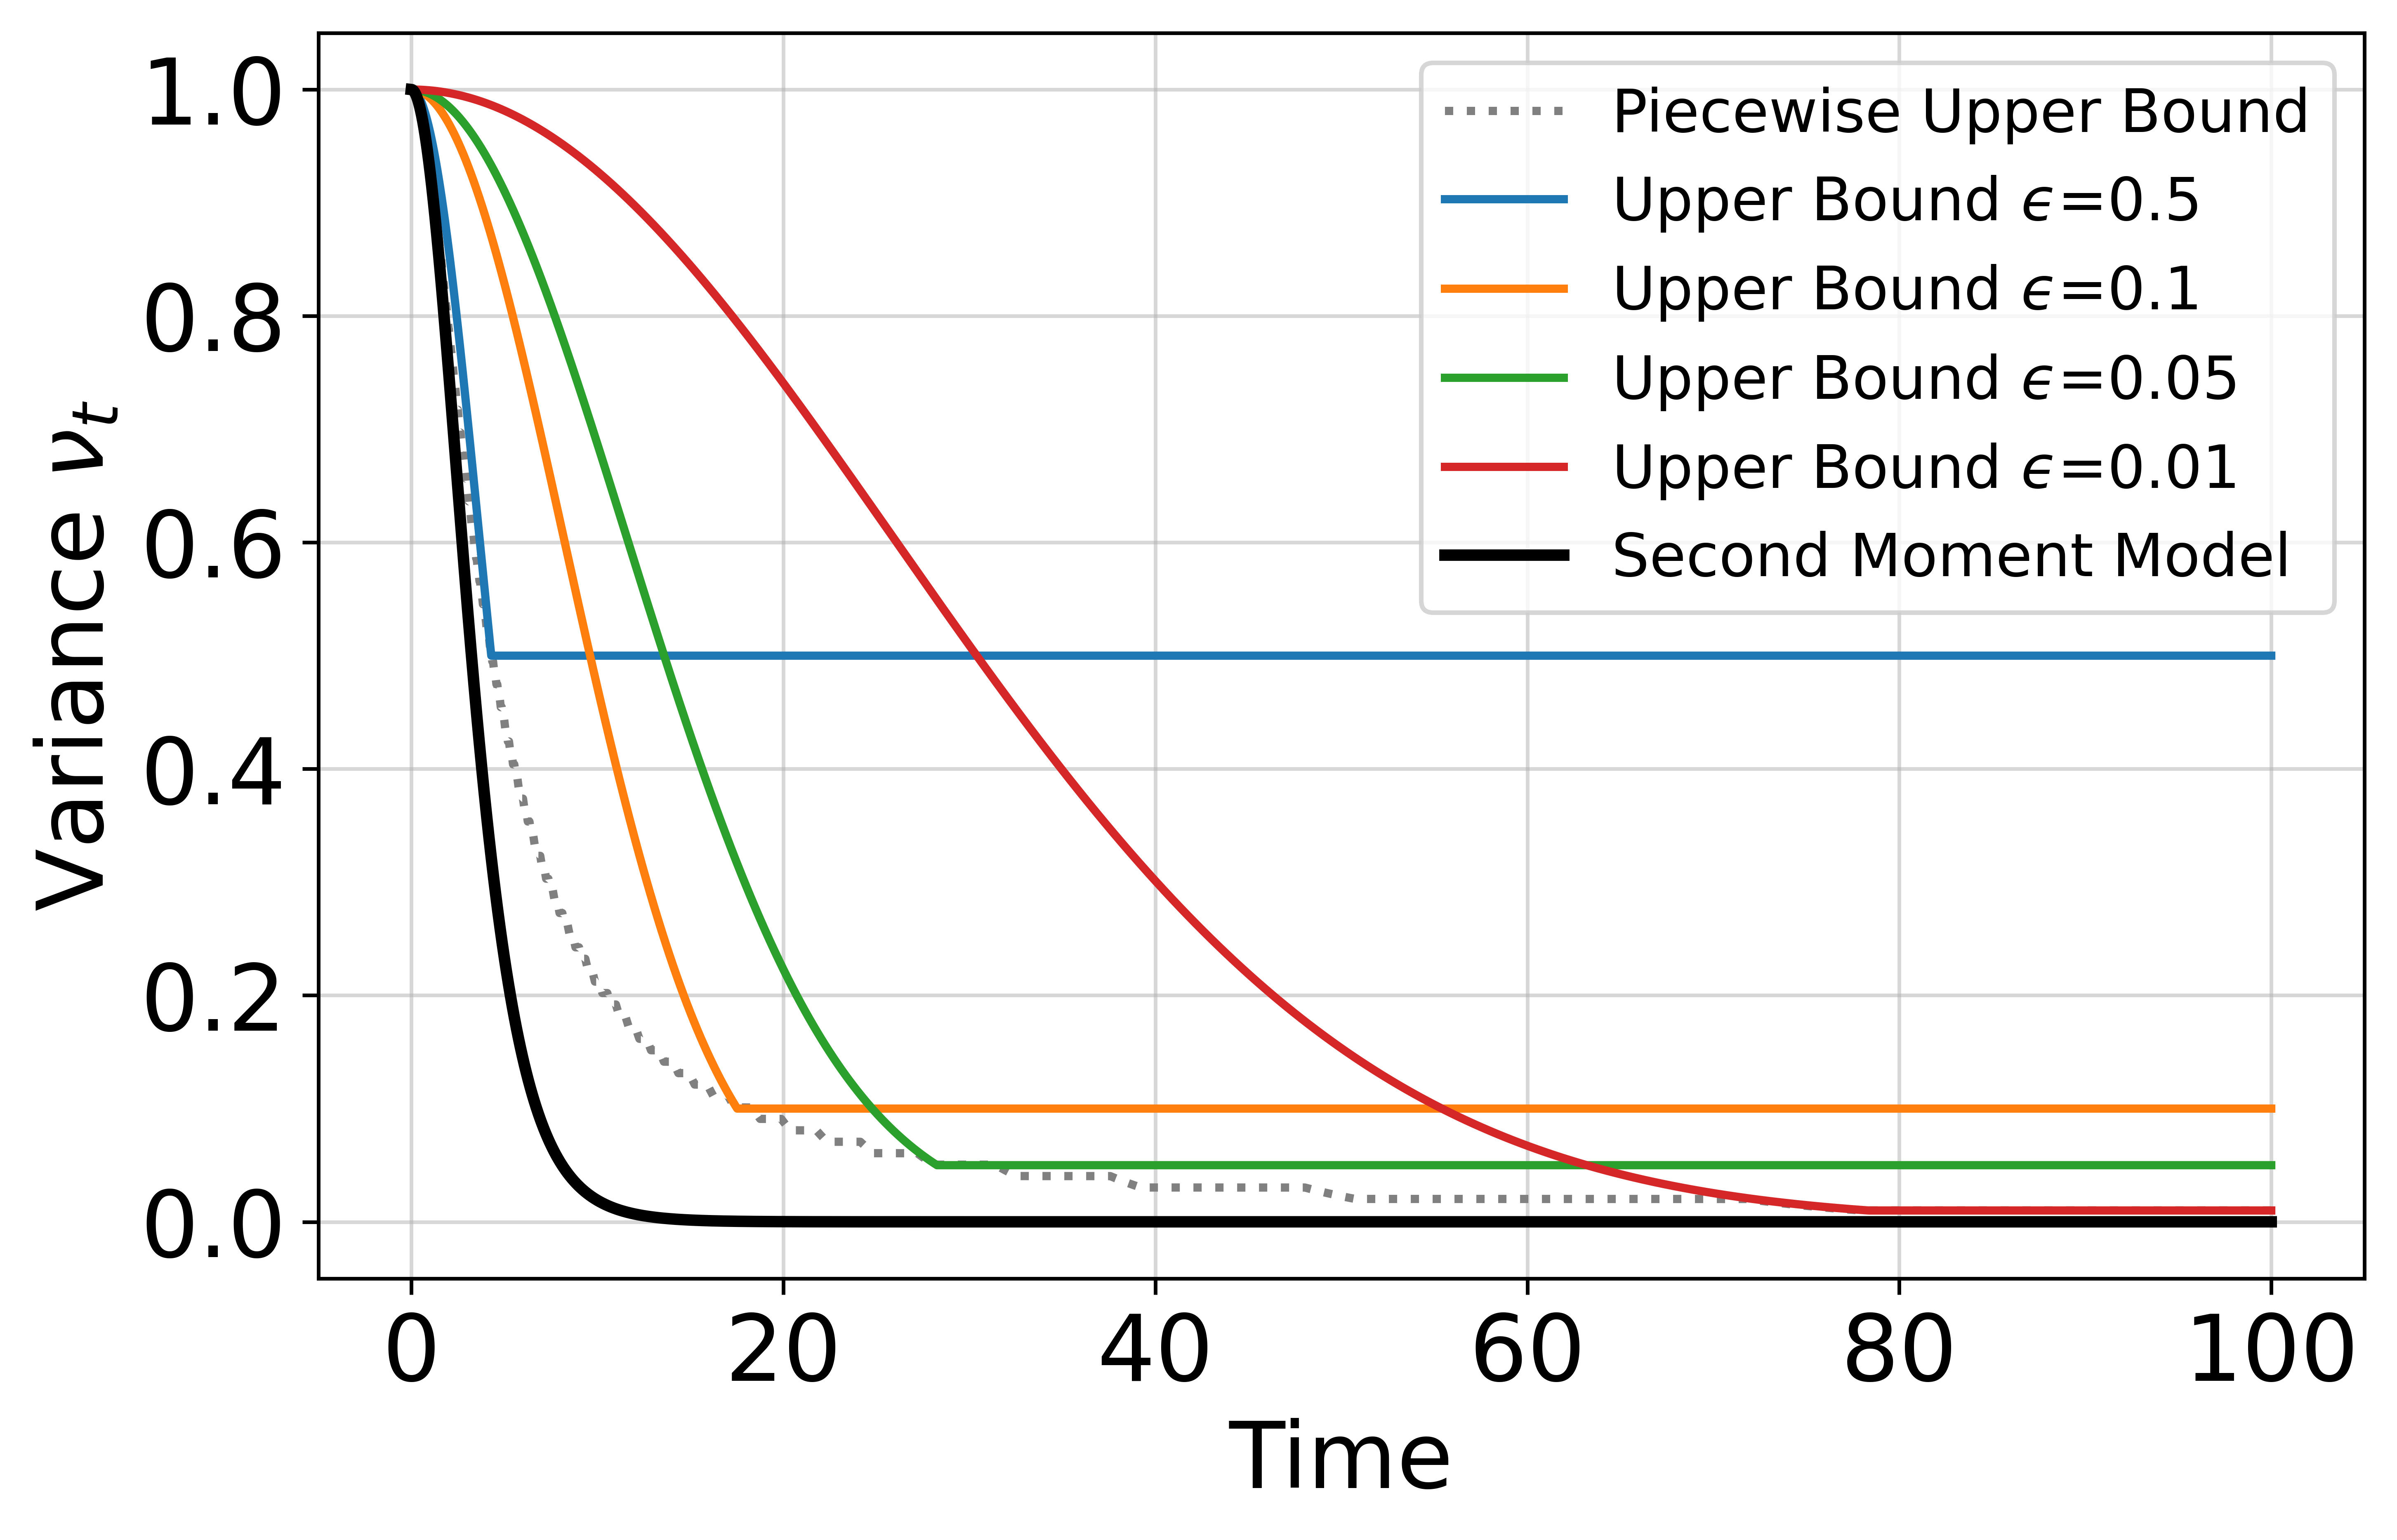

In [24]:
plt.figure(figsize=(8,5),dpi=800)

plt.plot(time, np.min(v_bound_full, axis=0),linewidth=1.8,label=f'Piecewise Upper Bound',c='grey',ls='dotted')
for i, eps in enumerate(eps_list):
    plt.plot(time, v_bound[i,:],linewidth=1.8,label=f'Upper Bound $ϵ$={eps}')

plt.plot(time, v_hist,c='k',linewidth=2.5, label='Second Moment Model')
plt.legend(loc='best',fontsize=13)
plt.xlabel('Time')
plt.ylabel('Variance $\\nu_t$')
plt.grid(alpha=0.5)
plt.show()

In [18]:
# eps_list=[0.5,0.25, 0.1, 0.05, 0.01]
eps_list_full=np.linspace(1,0,100)
v_bound_full=np.zeros((len(eps_list),T))
for i, eps in enumerate(eps_list_full):
    C_eps = 2*ptil*(delta+1.5*eps)
    v_exp = v_init*np.exp([-C_eps*g(t,lam)/sigma**2 for t in time])
    v_bound_full[i,:] = np.maximum(v_exp, eps*sigma**2)

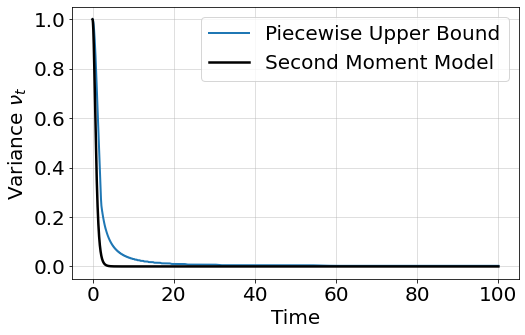

In [192]:
plt.figure(figsize=(8,5))

plt.plot(time, np.min(v_bound, axis=0),linewidth=2,label=f'Piecewise Upper Bound')
plt.plot(time, v_hist,c='k',linewidth=2.5, label='Second Moment Model')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Variance $\\nu_t$')
plt.grid(alpha=0.5)
plt.show()

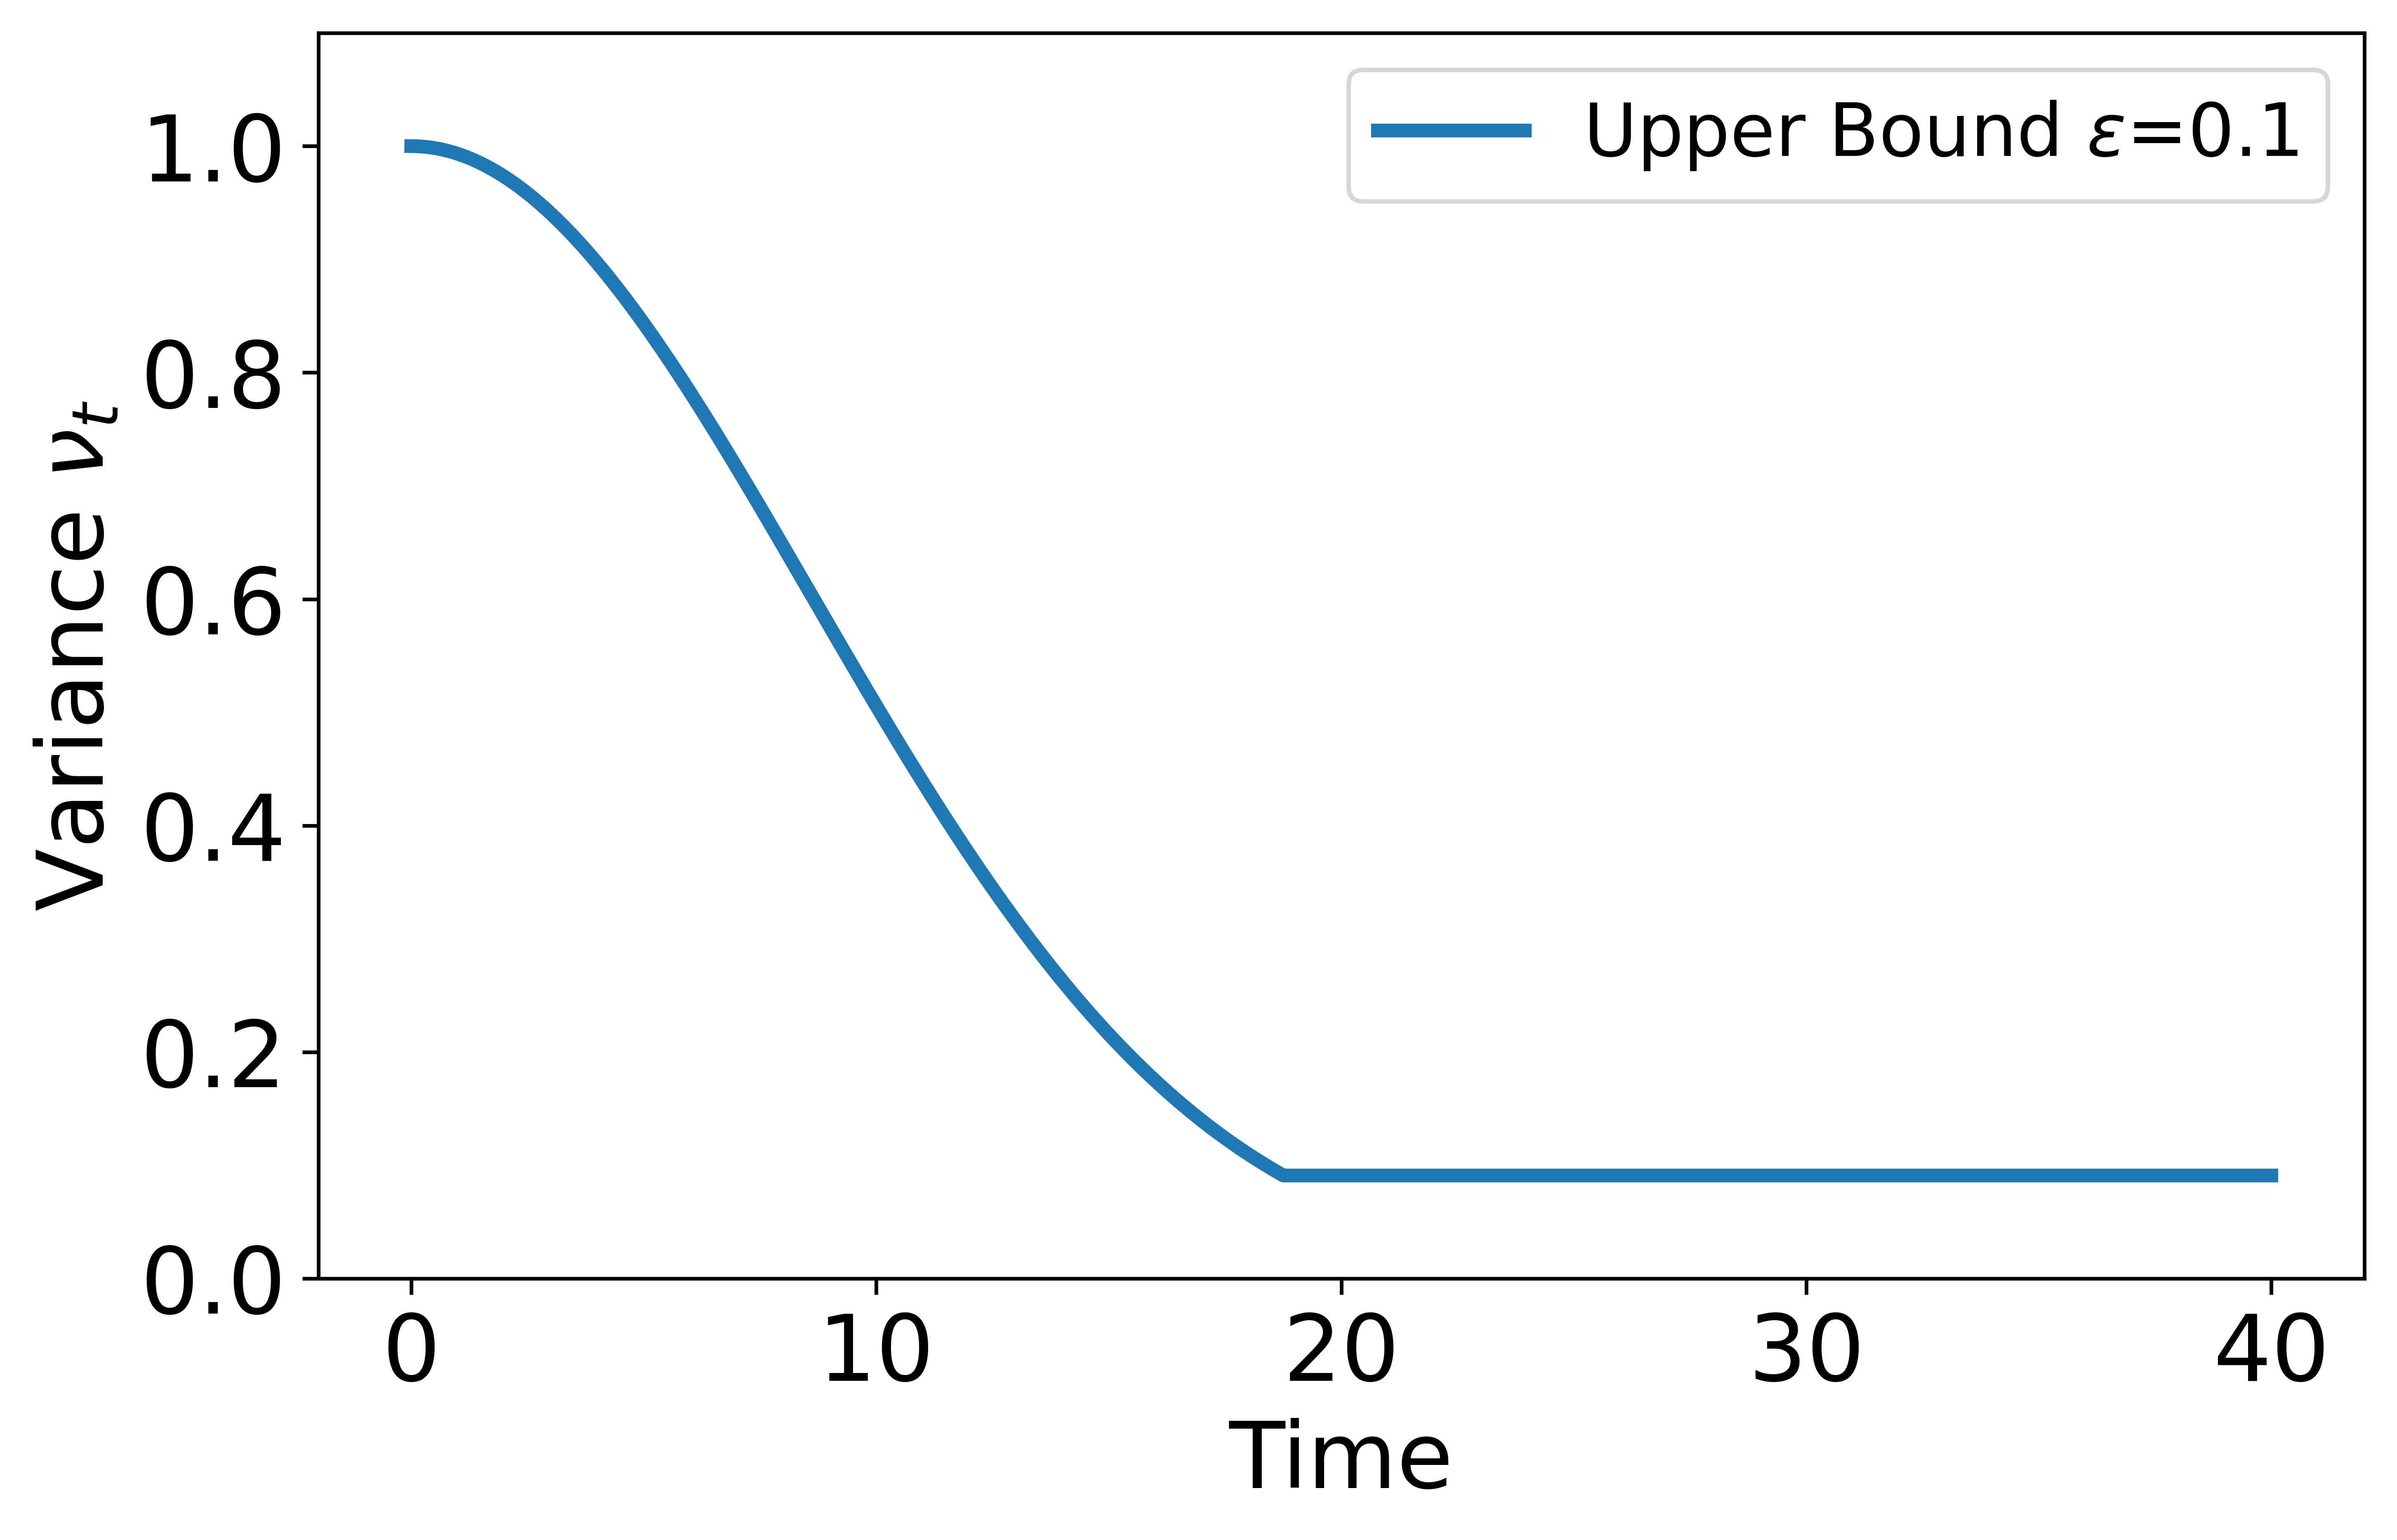

In [181]:
plt.figure(figsize=(8,5),dpi=800)
plt.plot(time[0:40000], v_bound[90,0:40000],linewidth=3,label=f'Upper Bound $\epsilon$=0.1')
plt.ylim(0,1.1)
plt.xlabel('Time')
plt.ylabel('Variance $\\nu_t$')
plt.legend(fontsize=16)

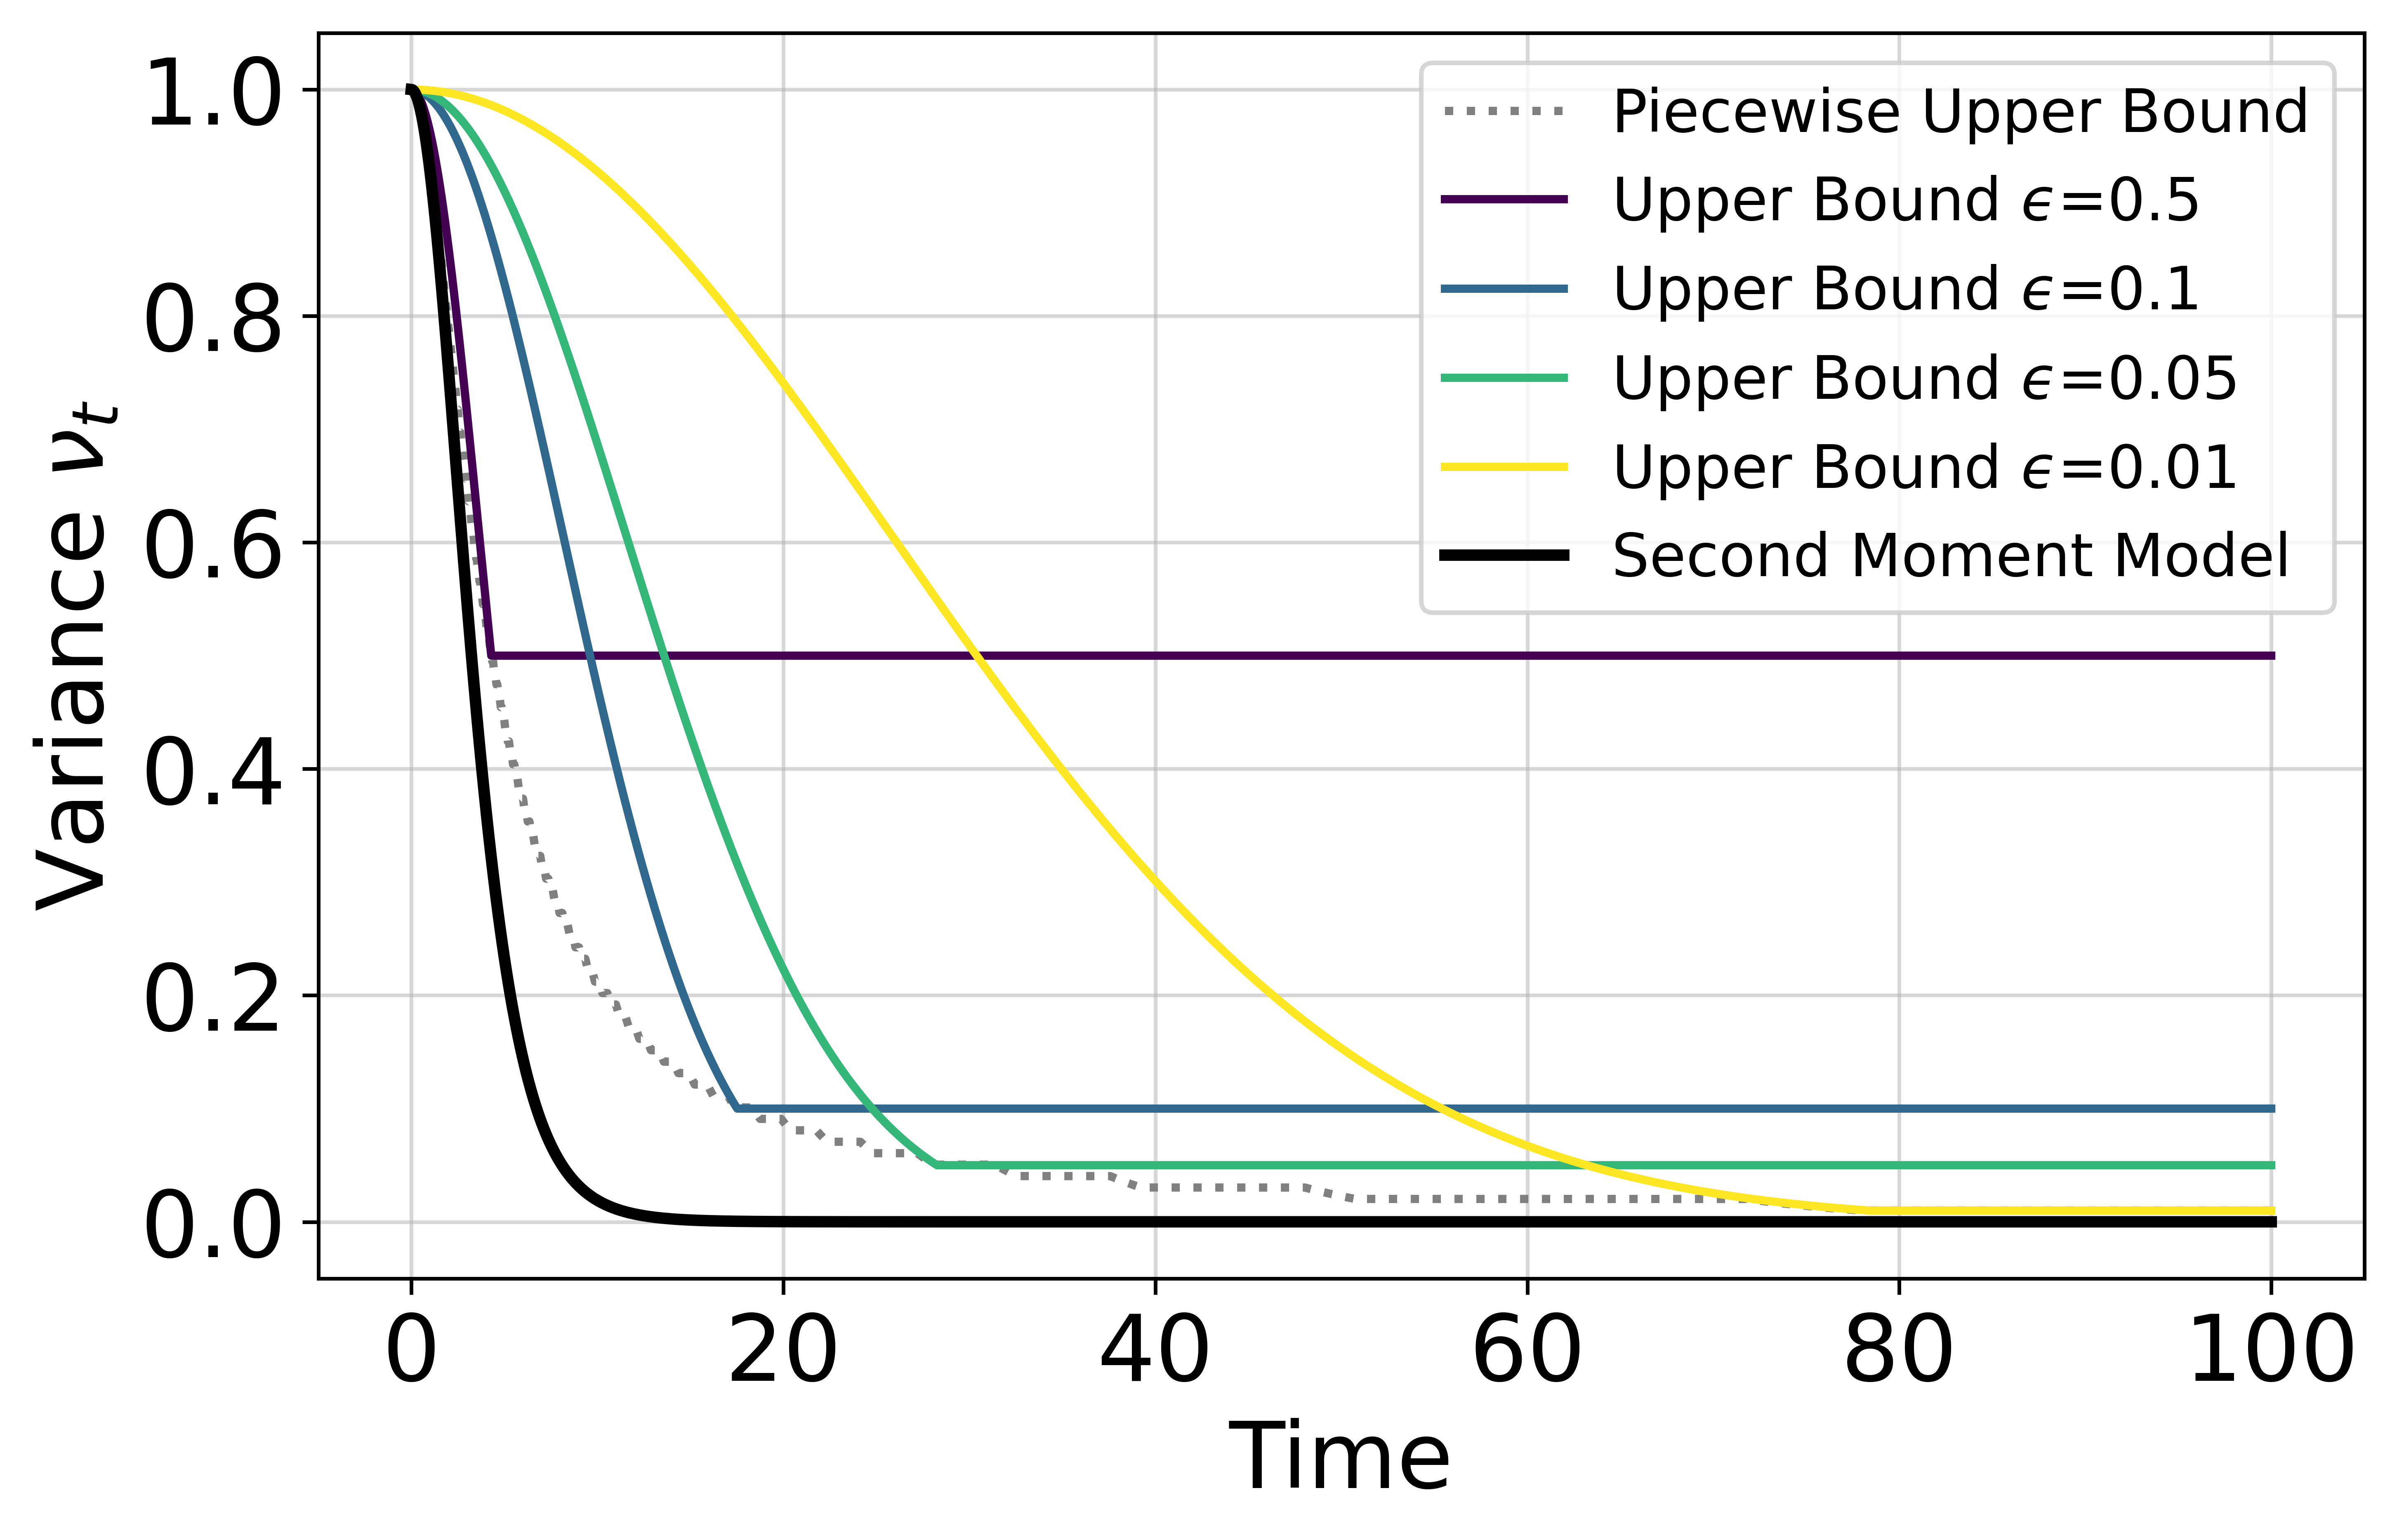

In [39]:
# Create a colormap
# cmap = plt.cm.YlOrRd
cmap = plt.cm.viridis
# Manually sample the colormap
colors = cmap(np.linspace(0, 1, 4))

plt.figure(figsize=(8,5),dpi=800)

plt.plot(time, np.min(v_bound_full, axis=0),linewidth=1.8,label=f'Piecewise Upper Bound',c='grey',ls='dotted')
for i, eps in enumerate(eps_list):
    plt.plot(time, v_bound[i,:],linewidth=1.8,label=f'Upper Bound $ϵ$={eps}',c=colors[i])

plt.plot(time, v_hist,c='k',linewidth=2.5, label='Second Moment Model')
plt.legend(loc='best',fontsize=13)
plt.xlabel('Time')
plt.ylabel('Variance $\\nu_t$')
plt.grid(alpha=0.5)
plt.show()